# Dados Multivariados

Podemos representar a matriz de dados da seguinte forma:

$$ Y_{n \times p} = \begin{bmatrix}Y_{11} & \dots & Y_{1p} \\ \vdots & \ddots & \vdots \\ Y_{n1} & \dots & Y_{np} \end{bmatrix} $$

Amostras: $i = 1, \dots, n$

Parâmetros: $j = 1, \dots, p$

Deste modo, 

$$ Y_{ij} = \text{Resposta da i-ésima amostra para o j-ésimo parâmetro}  $$  


Um exemplo de dados, medidas do crânio de 7 raças de cachorros pré-históricos (Manly, 2005):

In [3]:
caes = read.table("MAE0330-Caes", sep=";", header = T)
print(caes)
dim(caes)

    X1   X2   X3   X4   X5   X6
1  9.7 21.0 19.4  7.7 32.0 36.5
2  8.1 16.7 18.3  7.0 30.3 32.9
3 13.5 27.3 26.8 10.6 41.9 48.1
4 11.5 24.3 24.5  9.3 40.0 44.6
5 10.7 23.5 21.4  8.5 28.8 37.6
6  9.6 22.6 21.1  8.3 34.4 43.1
7 10.3 22.1 19.1  8.1 32.2 35.0


[1] 7 6

Neste caso,

Amostras: n = 7

Parâmetros: p = 6

# Estatísticas Descritivas

#### Média da j-ésima variável:

$$\bar{Y_{j}} = \frac{1}{n} \sum_{i=1}^n Y_{ij} = \frac{1}{n} (1'Y{.j})$$

Assim, $\bar{Y}$ é vetor de médias.

#### Covariância entre variáveis j e j':

$$s_{jj'} = \frac{1}{n-1} \sum_{i=1}^n (Y_{ij}-\bar{Y_j})(Y_{ij'}-\bar{Y_{j'}})$$

Assim, $S$ é a matrix de variâncias e covariâncias de $Y$.

#### Correlação entre as variáveis j e j':

$$r_{jj'} = \frac{s_{jj'}}{\sqrt{s_{jj}}\sqrt{s_{j'j'}}} = \frac{\sum_{i=1}^n (Y_{ij}-\bar{Y_j})(Y_{ij'}-\bar{Y_{j'}})}{\sqrt{\sum_{i=1}^n (Y_{ij}-\bar{Y_j})^2}\sqrt{\sum_{i=1}^n (Y_{ij'}-\bar{Y_{j'}})^2}}$$

Assim, $S$ é a matrix de correlações de $Y$.

#### Variância total de Y:

$$ V.T. = tr(Y) - \sum_{i=1}^n s_{ii} $$

#### Variância generalizada de Y:

$$ V.G. = |S| $$ 

#### Algumas considerações:

- O valor de r deve ser entre -1 e 1

- r mede a força da associação linear (0 é fraco e 1 é forte). O sinal indica a direção da associação.

- O valor de $r_{jj'}$ não muda se as medidas da j-ésima variável mudam para $y_{ji} = ax_{ji}+b$ e os valores da j'-ésima variável muda para $y_{j'i} = cx_{j'i}+d$ para $i = 1,\dots,n$ dadas que as constantes $a$ e $c$ possuem o mesmo sinal.

- Covariância e correlação são muito sensíveis a outliers

### No exemplo, 

Média para a variável $x_2$:

$$ \bar{Y}_{x_2} = \frac{21+16.7+27.3+24.3+23.5+22.6+22.1}{7} = 22.5$$

No R:

In [4]:
medias = colMeans(caes)               
print(medias)

      X1       X2       X3       X4       X5       X6 
10.48571 22.50000 21.51429  8.50000 34.22857 39.68571 


O vetor "medias" pode ser descrito como o centróide de Y.

Covariância para as variáveis $x_2$ e $x_4$:

$$ s_{x_2x_4} = \frac{1}{7-1} \sum_{i=1}^7 (y_{ix_2}-22.5) (y_{ix_4}-8.5) = 3.59$$

No R:

In [5]:
covariancias = cov(caes)
print(covariancias)

         X1        X2        X3       X4        X5        X6
X1 2.881429  5.251667  4.846905 1.933333  6.527143  7.739762
X2 5.251667 10.556667  8.895000 3.593333 11.456667 15.583333
X3 4.846905  8.895000  9.611429 3.508333 13.427857 16.305238
X4 1.933333  3.593333  3.508333 1.356667  4.863333  5.920000
X5 6.527143 11.456667 13.427857 4.863333 24.362381 24.680476
X6 7.739762 15.583333 16.305238 5.920000 24.680476 31.518095


Correlação entre as variáveis $x_2$ e $x_4$:

$$ r_{x_2x_4} = \frac{\sum_{i=1}^7  (y_{ix_2}-22.5) (y_{ix_4}-8.5)}{\sqrt{\sum_{i=1}^7 (y_{ix_2}-22.5)^2} \sqrt{\sum_{i=1}^7 (y_{ix_4}-8.5)^2}} = 0.9495$$


In [6]:
correlacoes = cor(caes)
print(correlacoes)

          X1        X2        X3        X4        X5        X6
X1 1.0000000 0.9522036 0.9210148 0.9778365 0.7790392 0.8121639
X2 0.9522036 1.0000000 0.8830567 0.9495056 0.7143894 0.8543129
X3 0.9210148 0.8830567 1.0000000 0.9715615 0.8775116 0.9368136
X4 0.9778365 0.9495056 0.9715615 1.0000000 0.8459362 0.9053263
X5 0.7790392 0.7143894 0.8775116 0.8459362 1.0000000 0.8906636
X6 0.8121639 0.8543129 0.9368136 0.9053263 0.8906636 1.0000000


#### Os valores de $y$ podem ser padronizados:

$$ y_{ij}^* = \frac{y_{ij}-\bar{y}_j}{\sqrt{s_{jj}}}$$

Para $i = 1,...,7$ e $j = 1,...,6$

Assim as variáveis estão centradas no zero e, deste modo, teremos que:

$$ S^* = R^* = R $$

In [7]:
diagonal = sqrt(1/diag(covariancias))

caesEstrela=caes

for(i in 1:6){
  b = (caes[,i]-medias[i])*diagonal[i]
  caesEstrela[,i] = b
}

print(cov(caesEstrela))
print(cor(caesEstrela))
print(cor(caes))

          X1        X2        X3        X4        X5        X6
X1 1.0000000 0.9522036 0.9210148 0.9778365 0.7790392 0.8121639
X2 0.9522036 1.0000000 0.8830567 0.9495056 0.7143894 0.8543129
X3 0.9210148 0.8830567 1.0000000 0.9715615 0.8775116 0.9368136
X4 0.9778365 0.9495056 0.9715615 1.0000000 0.8459362 0.9053263
X5 0.7790392 0.7143894 0.8775116 0.8459362 1.0000000 0.8906636
X6 0.8121639 0.8543129 0.9368136 0.9053263 0.8906636 1.0000000
          X1        X2        X3        X4        X5        X6
X1 1.0000000 0.9522036 0.9210148 0.9778365 0.7790392 0.8121639
X2 0.9522036 1.0000000 0.8830567 0.9495056 0.7143894 0.8543129
X3 0.9210148 0.8830567 1.0000000 0.9715615 0.8775116 0.9368136
X4 0.9778365 0.9495056 0.9715615 1.0000000 0.8459362 0.9053263
X5 0.7790392 0.7143894 0.8775116 0.8459362 1.0000000 0.8906636
X6 0.8121639 0.8543129 0.9368136 0.9053263 0.8906636 1.0000000
          X1        X2        X3        X4        X5        X6
X1 1.0000000 0.9522036 0.9210148 0.9778365 0.7790392 0.

A função *scale* do R faz a mesma coisa, mas eu queria deixar claro o cálculo. =P

O centróide de $Y^*$ será o vetor de zeros e a variância total será igual ao valor de $p$, uma vez que a diagonal de $S^*$ contém apenas 1.

A correlação pode indicar uma relação indireta, por exemplo, se a variável A influencia B e C, mesmo que B e C sejam independentes, a correlação irá existir entre eles. Assim, podemos calcular a **Correlação Parcial** destas duas variáveis ($\rho_{BC|A}$).

#### Correlação parcial entre as variáveis $j$ e $j'$ dado $p$ variáveis:

$$ \rho_{jj'P \backslash jj'} =  \frac{-w_{jj'}}{\sqrt{w_{jj}w_{j'j'}}}$$

Sendo que a matriz $W$ é dada pela inversa da matriz $S$.


In [10]:
inversaCov = solve(covariancias)

corMarg = inversaCov

for(i in 1:nrow(inversaCov)){
  for(j in 1:ncol(inversaCov)){
    corMarg[i,j] = -corMarg[i,j]/sqrt(inversaCov[i,i]*inversaCov[j,j]) 
  }
}

print(corMarg)

           X1         X2         X3         X4         X5         X6
X1 -1.0000000  0.8101713  0.4771876  0.7061076  0.7124201 -0.9127644
X2  0.8101713 -1.0000000 -0.7213236 -0.1992454 -0.8414502  0.8919502
X3  0.4771876 -0.7213236 -1.0000000  0.1973347 -0.5309113  0.6757264
X4  0.7061076 -0.1992454  0.1973347 -1.0000000 -0.2226388  0.4753696
X5  0.7124201 -0.8414502 -0.5309113 -0.2226388 -1.0000000  0.8364454
X6 -0.9127644  0.8919502  0.6757264  0.4753696  0.8364454 -1.0000000


Deste modo, temos que, por exemplo, as variáveis $x_1$ e $x_3$ que tinham uma correlação de 92%, e sem o efeito das outras variáveis, pasosu a ter apenas 47% de correlação. A diagonal será definida como positiva.

A **correlação parcial** pode ser calculada de outras formas, como por exemplo, por regressão linear.


# Medidas de Distância

Dado o ponto $P$ em um espaço n-dimensional, $P=(x_1,\dots, x_n)$, sua distância eucliadiana da origem pode ser descrita como:

$$ d(O, P) = \sqrt{x_1^2 + \dots + x_n^2} $$

E sua distância para um ponto $Q$, $Q=(y_1,\dots, y_n)$, dado por:

$$ d(P, Q) = \sqrt{(x_1-y_1)^2 + \dots + (x_n -y_n)^2} $$

Essa definição de $d$ descreve uma hiperesfera (esfera para n=2). 

Entretanto, cada coordenada contribui da mesma forma para a distância euclidiana, impedindo a possibilidade de dar pesos as variáveis.

##### Distância euclidiana supõe variáveis independentes e variâncias homogêneas.

## Distâncias estatísticas

Distância que leva em consideração as diferenças de variação e o grau de correlação.

Uma forma é calcular a distância euclidiana com os valores padronizados (Distância de Pearson):

$$ d(O, P) = \sqrt{\frac{x_1^2}{s_{11}} + \dots + \frac{x_n^2}{s_{nn}}} $$

$$ d(P,Q) = \sqrt{\frac{(x_1-y_1)^2}{s_{11}} + \dots + \frac{(x_n-y_n)^2}{s_{nn}}} $$

Entretanto, essas distâncias, como esperado quando $s$ é diferente para cada variável, formam elipsóides. Assim, supõe-se que as variáveis são independentes.

#### Padronizar as variáveis é solução quando supõe-se heterocedasticidade e independência.  

**Quando as variáveis são correlacionadas e com variabilidade diferentes**, uma solução é a distância de Mahalanobis. 

Considera-se duas variáves: $x_1$ e $x_2$ correlacionadas e com variâncias diferentes. Rotaciona-se o sistema de eixos de modo que um dos eixos descreva o eixo de maior variância.

Assim:

$$ d(O,P) = \sqrt{\frac{\tilde{x}^2_1}{\tilde{s}_{11}}+\frac{\tilde{x}^2_2}{\tilde{s}_{22}}} $$

Em que:

$$\tilde{x}_1 = x_1 cos(\theta) + x_2 sin(\theta) $$
$$\tilde{x}_1 = -x_1 sin(\theta) + x_2 cos(\theta) $$

Gerando,

$$ d(O,P) = \sqrt{a_{11}x^2_1 + 2a_{12}x_1x_2 + a_{22}x_2^2}$$

Em que, $a$ são valores obtidos de acordo com o ângulo $\theta$.

Generalizando,

$$ d_M^2(P,\mu) = (Y_{px1}-\mu_{px1})'S(Y_{px1}-\mu_{px1})$$

### Propriedades:

- $ d(P,Q) = d(Q,P) $
- $ d(P,Q) > 0 \text{ se } P \neq 0$
- $ d(P,Q) = 0 \text{ se } P=Q$
- $ d(P,Q) \leq d(P,R)+d(R,Q)$ para $R$ entre $P$ e $Q$

### Por que usar as distâncias?

1. Diagnóstico de observações atípicas (Distância da observação à média);
2. Técnicas de agrupamento.

Por exemplo, usando a distância de Malahanobis, podemos usar o seguinte teste para identificar outliers:  $d^2_M \sim \chi ^2_p$.

No caso do exemplo dos cães, nenhum ponto é considerado outlier, pois, para $\alpha=0.05$ todas as distâncias (ao quadrado) são abaixo de 12,59.

Se a matriz de covariâncias não for arredondada, espera-se que as distâncias dos pontos para o centróide sejam todas iguais. 

[1] 0.6341095 4.1650023 3.1278595 2.6621452 6.8209763 4.0234439 5.1738335


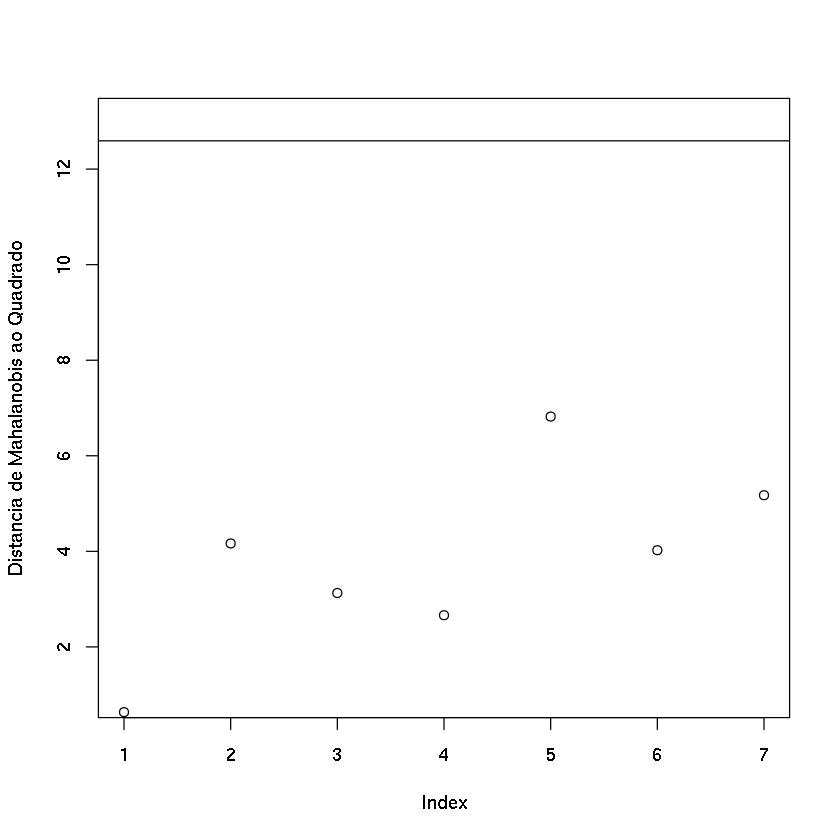

In [22]:
dm = mahalanobis(caes, medias, round(covariancias))
print(dm)
plot(dm, ylim=c(1,13), ylab="Distancia de Mahalanobis ao Quadrado")
abline(qchisq(.95, df=6), 0)

Um ex

Considerando a amostra 7 como um grupo diferente (cão ancestral), podemos calcular asdistâncias dos outros grupos de cães (cães modernos) e saber quais grupos são mais próximos 

# Análise de Componentes Principais

### Objetivos:

- Reduzir a dimensionalidade dos dados
- Descrever a variabilidade de variáveis correlacionadas

### Álgebra

A primeira componente principal (CP1) é a combinação linear das observações que descreve a maior variância dos dados. A segunda componente principal (CP2) descreve a segunda maior variância dos dados ortogonal à primeira componente, e assim por diante até a n-énesima componente ($n$ = número de variáveis).

$$ PC = a_{11}x_1 + a_{12}x_2 + \dots + a_{1q}x_q$$